# Notebook for plotting model training runs by layer on the hard modelling task

In [1]:
import torch
import os
import matplotlib.pyplot as plt

In [2]:
layer_vals = [1, 2, 4, 8, 16, 24]

In [8]:
all_accuracies = []
for n_layers in layer_vals:
    layer_str = str(n_layers)
    models_dir = os.path.join("layers/", "layer" + layer_str)
    all_files = [os.path.join(models_dir, f) for f in os.listdir(models_dir)]
    cur_accuracies = []
    for f in all_files:
        out = torch.load(f)
        if 'train' in out and out['train']:
            cur_accuracies.append(out["accuracies"])
        
    all_accuracies.append(cur_accuracies)

In [9]:
max_vals = []
for idx in range(len(layer_vals)):
    idx_max = -1
    for acc in all_accuracies[idx]:
        cur_max = torch.max(torch.tensor(acc))
        if cur_max > idx_max:
            idx_max = cur_max
    max_vals.append(idx_max)

In [10]:
for idx in range(len(max_vals)):
    print(str(layer_vals[idx]) + "--> " + str(max_vals[idx].item()))

1--> 34.52083206176758
2--> 51.07291793823242
4--> 66.01041412353516
8--> 78.97916412353516
16--> 77.22916412353516
24--> 81.77083587646484


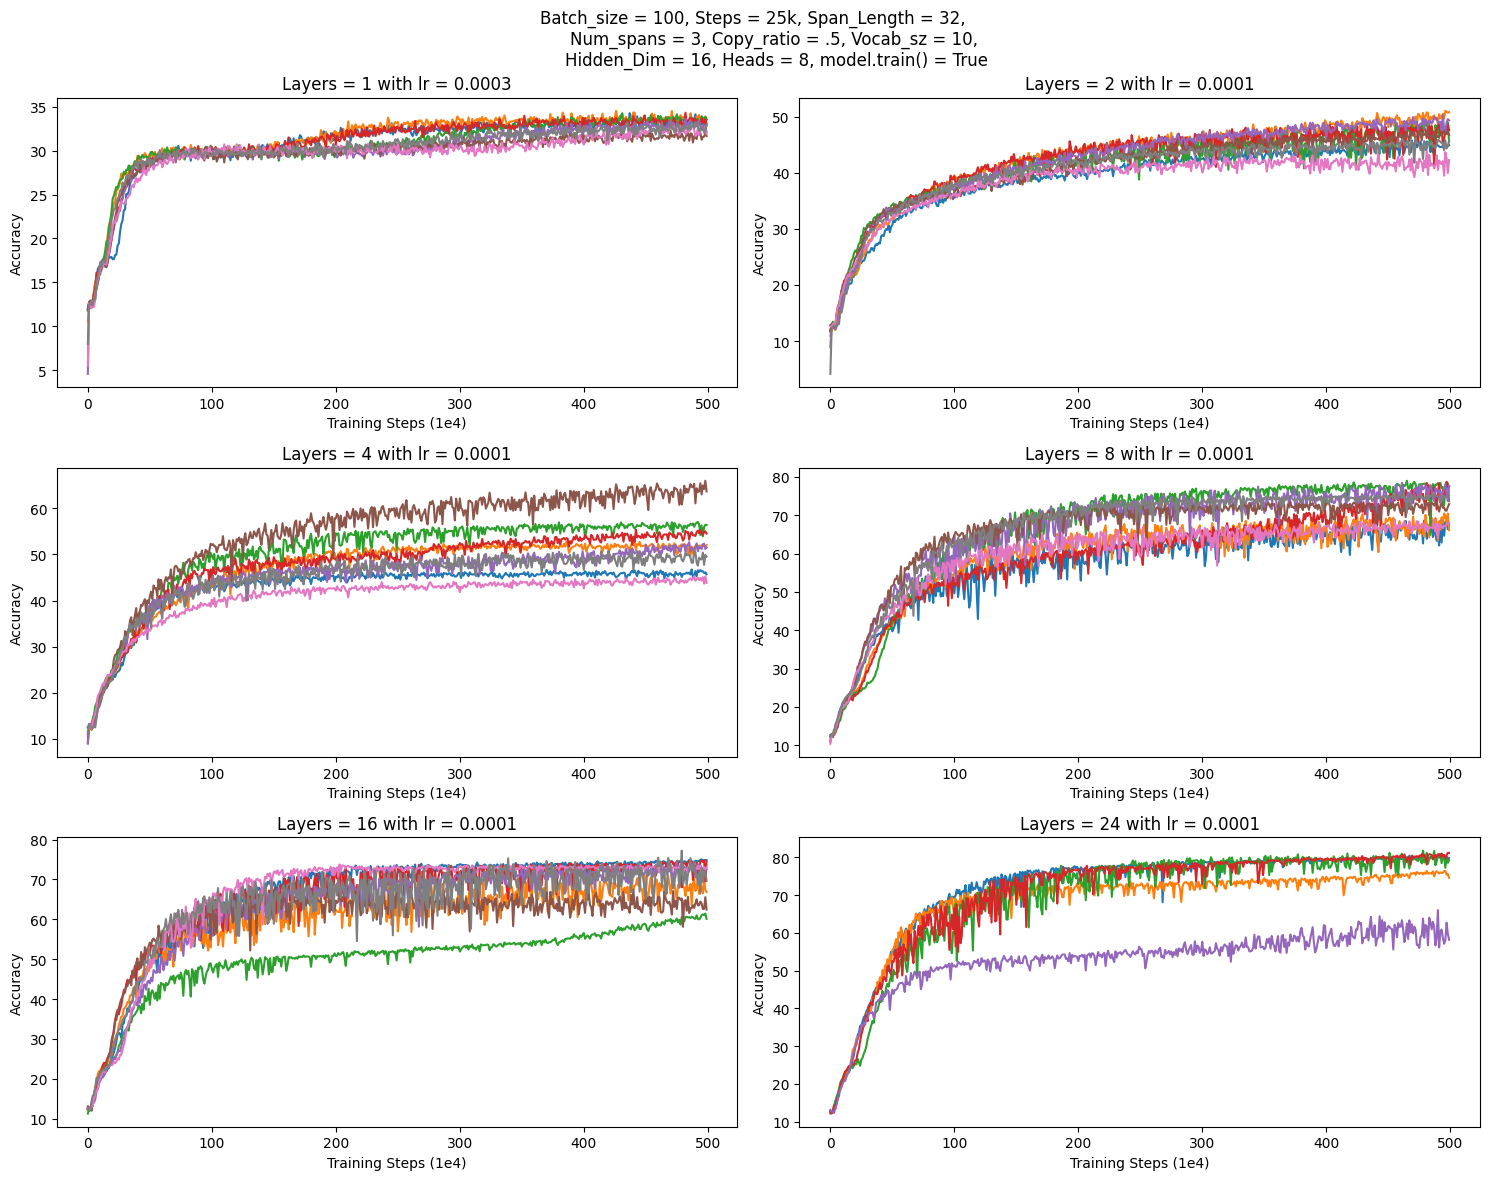

In [12]:
n_rows = 3
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 12))
for l_idx in range(len(layer_vals)):
    cur_row = l_idx // n_cols
    cur_col = l_idx % n_cols
    
    n_layers = layer_vals[l_idx]
    cur_acc = all_accuracies[l_idx]
    for acc in cur_acc:
        ax[cur_row][cur_col].plot(acc)
    
    ax[cur_row][cur_col].set_ylabel('Accuracy')
    ax[cur_row][cur_col].set_xlabel('Training Steps (1e4)')

    if n_layers == 1:
        lr = str(.0003)
    else:
        lr = str(.0001)
        
    ax[cur_row][cur_col].set_title("Layers = " + str(n_layers) + " with lr = " + lr)

_ = fig.suptitle("    Batch_size = 100, Steps = 25k, Span_Length = 32, \n\
            Num_spans = 3, Copy_ratio = .5, Vocab_sz = 10, \n\
            Hidden_Dim = 16, Heads = 8, model.train() = True")
fig.tight_layout()